In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [13]:
# Read train.csv
train_df = pd.read_csv('train.csv',header=0)

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


After observation,PassengerId \ Name \ Ticket and other can not provide effective information related to survivors

In [15]:
# Remove the useless data.
train_df = train_df.drop(['PassengerId','Name','Ticket'], axis = 1)

In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.7+ KB


Thus, fields such as Age / Cabin / Embarked have missing values and should be dealt with later in the analysis

1.Basic information

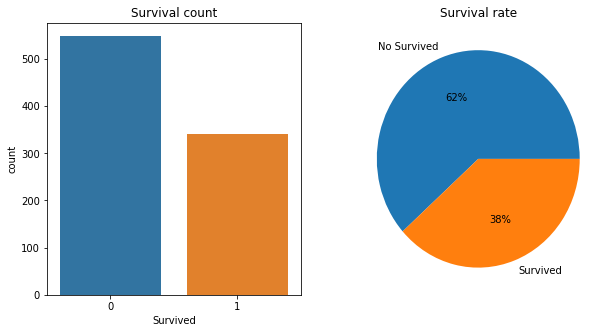

In [17]:
# Among the 891 people, how many survived?
total_survived_num = train_df['Survived'].sum()
total_no_survived_num = 891 - total_survived_num
plt.figure(figsize = (10,5))
plt.subplot(121)
sns.countplot(x='Survived',data=train_df)
plt.title('Survival count')

plt.subplot(122)
plt.pie([total_no_survived_num, total_survived_num],labels=['No Survived','Survived'],autopct='%1.0f%%')
plt.title('Survival rate') 

plt.show()

In this 891 passengers, 38% and 62% survived and survived respectively.

Next，I will analyze the relationship between Pclass, Sex, Age, SibSp, Parch, Fare, Cabin and the "survival". 

2.Pclass

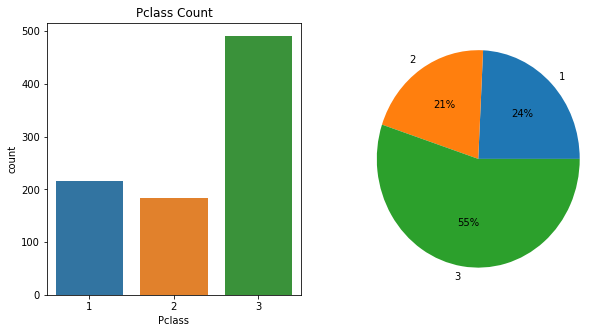

In [18]:
#The number and proportion of cabins at different levels
train_df[['Pclass','Survived']].groupby(['Pclass']).count()
plt.figure(figsize= (10 ,5))
plt.subplot(121)
sns.countplot(x='Pclass', data=train_df)
plt.title('Pclass Count') 

plt.subplot(122)
plt.pie(train_df[['Pclass','Survived']].groupby(['Pclass']).count(),\
        labels=['1','2','3'],autopct='%1.0f%%')

plt.show()


Before the disaster, the passengers of first class, second class and third class were 216, 184 and 491 respectively, accounting for 24%, 21% and 55% respectively. 

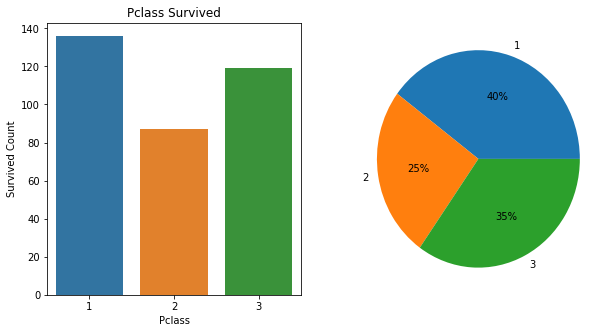

In [19]:
#The number of cabin survivors at different levels
#and the proportion of total survivors 
survived_df = train_df[train_df[ 'Survived'] == 1 ]
survived_df[['Pclass','Survived']].groupby(['Pclass']).sum()
plt.figure(figsize= (10, 5))
plt.subplot(121)
sns.countplot(x='Pclass', data=survived_df)
plt.title('Pclass Survived') 
plt.ylabel('Survived Count')

plt.subplot(122)
plt.pie(survived_df[['Pclass','Survived']].groupby(['Pclass']).sum(),\
        labels=['1','2','3'],autopct='%1.0f%%')
plt.show()

After the disaster, the number of passengers in first class, second class and third class was 136, 87 and 119, accounting for 40%, 25% and 35% respectively. 

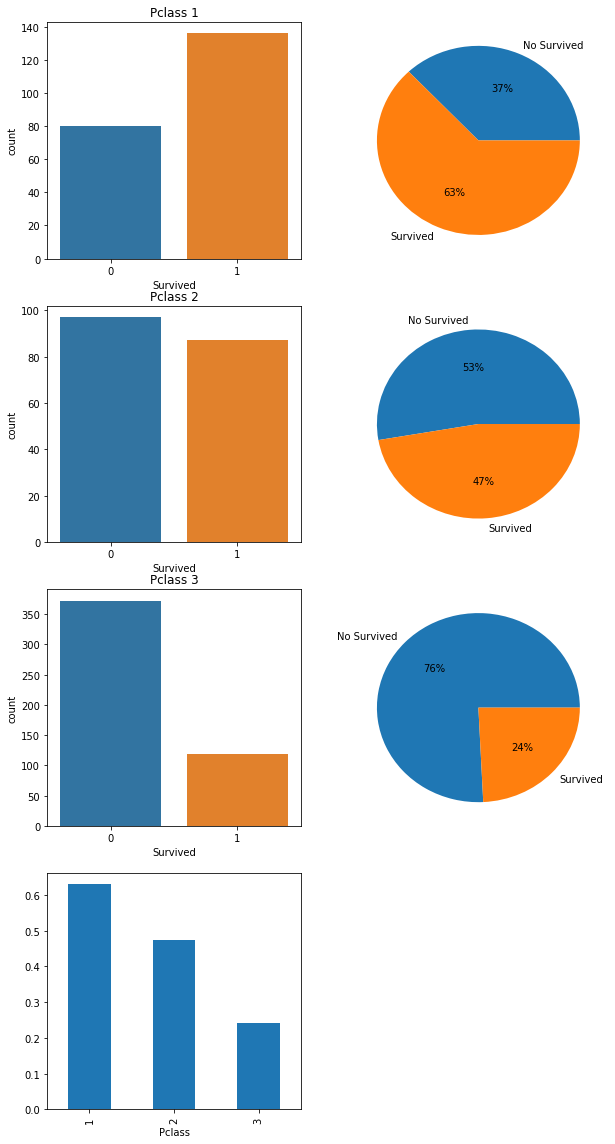

In [20]:
#The number of survivors 
#and the number of Non-survivors 
#and survival rates of different cabins 
pclass1 = train_df[train_df['Pclass'] == 1]
pclass2 = train_df[train_df['Pclass'] == 2]
pclass3 = train_df[train_df['Pclass'] == 3]

plt.figure(figsize=(10,20))
plt.subplot(421)
sns.countplot(x = 'Survived', data = pclass1)
plt.title('Pclass 1') 

plt.subplot(422)
plt.pie([pclass1['Survived'][pclass1['Survived'] == 0].count(),pclass1['Survived'][pclass1['Survived'] == 1].count()],\
labels=['No Survived', 'Survived'],autopct='%1.0f%%')

plt.subplot(423)
sns.countplot(x = 'Survived', data = pclass2)
plt.title('Pclass 2') 

plt.subplot(424)
plt.pie([pclass2['Survived'][pclass2['Survived'] == 0].count(),pclass2['Survived'][pclass2['Survived'] == 1].count()],\
labels=['No Survived', 'Survived'],autopct='%1.0f%%')

plt.subplot(425)
sns.countplot(x = 'Survived', data = pclass3)
plt.title('Pclass 3') 

plt.subplot(426)
plt.pie([pclass3['Survived'][pclass3['Survived'] == 0].count(),pclass3['Survived'][pclass3['Survived'] == 1].count()],\
labels=['No Survived', 'Survived'],autopct='%1.0f%%')

plt.subplot(427)
survived_by_pclass = train_df.groupby('Pclass')['Survived'].mean()
survived_by_pclass.plot(kind = 'bar')

plt.show()

First class survival rate is 63%, second class is 47%, third class is 24%. The higher the cabin, the higher the survival rate. 

3.Sex

577 314


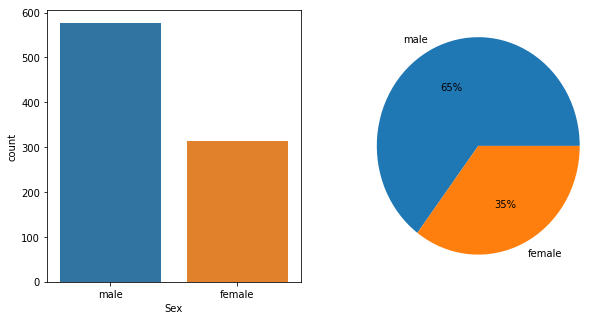

In [23]:
#The Number and ratio of men and women on board
male_sum = train_df['Sex'][train_df['Sex'] == 'male'].count()
female_sum = train_df['Sex'][train_df['Sex'] == 'female'].count()
print(male_sum,female_sum)
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.countplot(x='Sex', data=train_df)
plt.subplot(122)
plt.pie([male_sum,female_sum],\
        labels=['male', 'female'],autopct='%1.0f%%')
plt.show()

Before the disaster, there were 891 men, 577 males and 314 females, compared with 65 percent of men and 35 percent of women. 

109 233


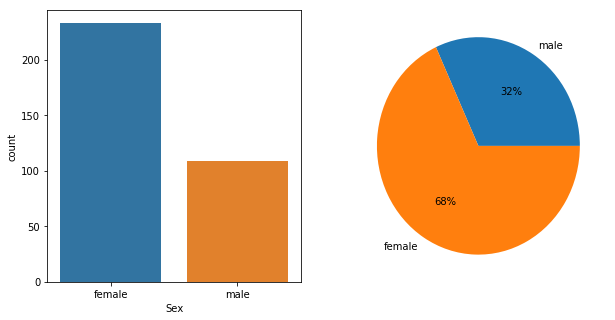

In [24]:
#The number of men and women alive and the proportion of men and women 
survived_male_sum = survived_df['Sex'][survived_df['Sex'] == 'male'].count()
survived_female_sum = survived_df['Sex'][survived_df['Sex'] == 'female'].count()
print(survived_male_sum, survived_female_sum)
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.countplot(x='Sex', data=survived_df)
plt.subplot(122)
plt.pie([survived_male_sum, survived_female_sum],\
        labels=['male', 'female'],autopct='%1.0f%%')
plt.show()

After the disaster, the men changed to 109, and the number of women changed to 233, and the proportion of men and women changed to 32 and 68 percent. 

4.Age

Since Age has lost value, the problem of missing value is processed. Age has a large number of missing values, and the population of Age is a random number within the standard deviation range of the average Age.


In [26]:
#Find the mean of age, standard deviation, and the number of missing values
average_age_train   = train_df["Age"].mean()
std_age_train       = train_df["Age"].std()
count_nan_age_train = train_df["Age"].isnull().sum()
#Find the age random number, in the range(mean - std, mean + std)
rand_1 = np.random.randint(average_age_train - std_age_train, average_age_train + std_age_train, size = count_nan_age_train)
# Fill random values with Age's missing values
train_df["Age"][np.isnan(train_df["Age"])] = rand_1


C:\Users\Archihertz\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


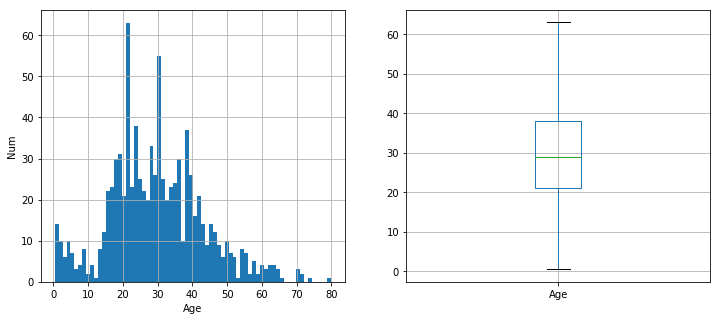

In [27]:
#Age distribution
plt.figure(figsize=(12,5))
plt.subplot(121)
train_df['Age'].hist(bins = 70)
plt.xlabel('Age')
plt.ylabel('Num')

plt.subplot(122)
train_df.boxplot(column='Age', showfliers=False)

plt.show()

In [29]:
train_df['Age'].describe()

count    891.000000
mean      29.745421
std       13.591121
min        0.420000
25%       21.000000
50%       29.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Among the 891 samples, the mean age was about 30, the standard deviation was 15, the minimum age was 0.42, and the maximum age was 80. 

5.SibSp

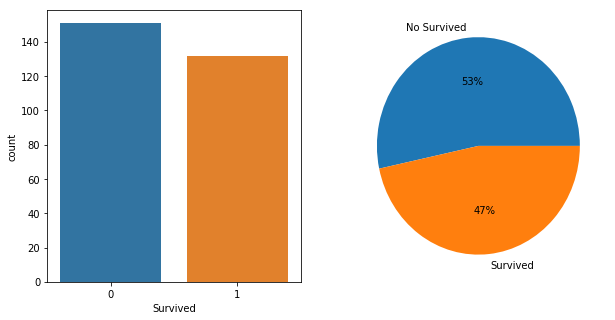

151 132


In [31]:
#Divided into two groups of brothers and sisters and no brothers and sisters
sibsp_df = train_df[train_df['SibSp'] != 0]
no_sibsp_df = train_df[train_df['SibSp'] == 0]
#the number and percentage of having brothers and sisters
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.countplot(x = 'Survived', data = sibsp_df )

plt.subplot(122)
plt.pie([sibsp_df['Survived'][sibsp_df['Survived'] == 0].count(),sibsp_df['Survived'].sum()],\
        labels=['No Survived', 'Survived'],autopct='%1.0f%%')
plt.show()
print(sibsp_df['Survived'][sibsp_df['Survived'] == 0].count(), sibsp_df['Survived'].sum())




The number of passengers who had brothers and sisters was 132, and the survival rate was 47 percent. 

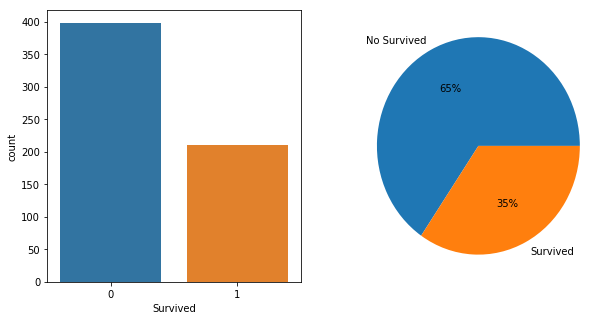

210


In [32]:
#the number and percentage of having no brothers and sisters
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.countplot(x = 'Survived', data = no_sibsp_df )

plt.subplot(122)
plt.pie([no_sibsp_df['Survived'][no_sibsp_df['Survived'] == 0].count(),no_sibsp_df['Survived'].sum()],\
        labels=['No Survived', 'Survived'],autopct='%1.0f%%')
plt.show()
print(no_sibsp_df['Survived'].sum())


The number of passengers who had no brothers and sisters was 210, and the survival rate was 35 percent.

6.Parch

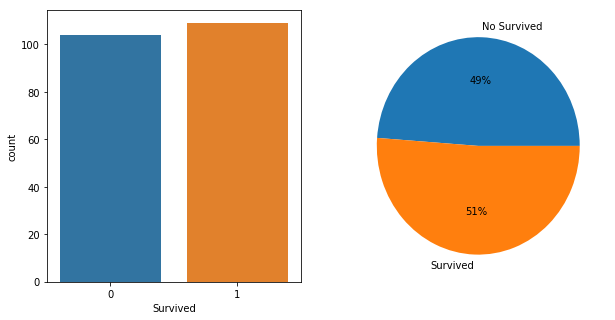

109


In [35]:
#Divided into having parents and children and no parents and children in two groups
parch_df = train_df[train_df['Parch'] != 0]
no_parch_df = train_df[train_df['Parch'] == 0]
#the number and percentage of having parents and children
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.countplot(x = 'Survived', data = parch_df )

plt.subplot(122)
plt.pie([parch_df['Survived'][parch_df['Survived'] == 0].count(),parch_df['Survived'].sum()],\
        labels=['No Survived', 'Survived'],autopct='%1.0f%%')
plt.show()
print(parch_df['Survived'].sum())


The number of passengers who had parents and children was 109, and the survival rate was 51 percent.

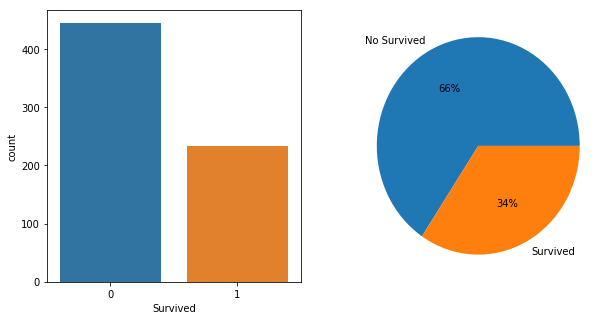

233


In [37]:
#the number and percentage of having no parents and children
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.countplot(x = 'Survived', data = no_parch_df)

plt.subplot(122)
plt.pie([no_parch_df['Survived'][no_parch_df['Survived'] == 0].count(),no_parch_df['Survived'].sum()],\
        labels=['No Survived', 'Survived'],autopct='%1.0f%%')
plt.show()
print(no_parch_df['Survived'].sum())

The number of passengers who had no parents and children was 233, and the survival rate was 34 percent.

7.Fare

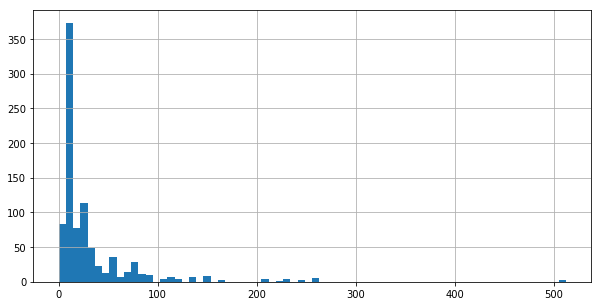

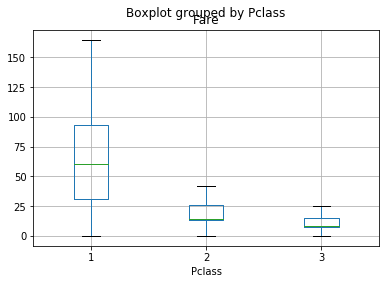

In [38]:
#Fare distribution
plt.figure(figsize=(10,5))
train_df['Fare'].hist(bins = 70)

train_df.boxplot(column='Fare', by='Pclass', showfliers=False)
plt.show()

In [39]:
train_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

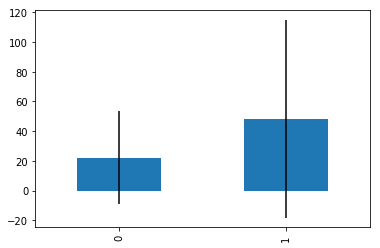

In [40]:
fare_not_survived = train_df["Fare"][train_df["Survived"] == 0]
fare_survived     = train_df["Fare"][train_df["Survived"] == 1]

avgerage_fare = pd.DataFrame([fare_not_survived.mean(), fare_survived.mean()])
std_fare      = pd.DataFrame([fare_not_survived.std(), fare_survived.std()])
avgerage_fare.plot(yerr=std_fare,kind='bar',legend=False)

plt.show()

It can be seen that Fare have a correlation with life, and the average fare for survivors is higher than that of the unsurvivable. 

8.Cabin

Lost too much value, I can not use this data to analyze the different effects of Cabin on the survival rate.

In [41]:
train_df.drop("Cabin",axis=1,inplace=True)

9.Embarked

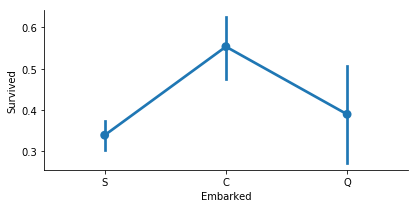

In [42]:
#Embarked has two missing values, planned to be populated with Modes
train_df["Embarked"] = train_df["Embarked"].fillna("S")
#The relationship of passengers boarding different ports and the rate of survival
sns.factorplot('Embarked','Survived', data=train_df,size=3,aspect=2)
plt.show()


The highest survivability from boarding C, followed by Q, S lowest